In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import neighbors

df = pd.read_csv("desktop/MSU_data_bootcamp/ML_challenge/exoplanet_data.csv")
print(f'there are {len(df)} rows prior to dropna')
df = df.dropna()
print(f'there are {len(df)} rows after dropna')
df.head(10)

there are 6991 rows prior to dropna
there are 6991 rows after dropna


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


notes on the dataset:

#RA and DEC are coordinates in the sky, so they shouldn't be predictive of a planet.

#KOI disposition is the outcome. 

#last column is a magnitude measure

#srad is most likey stellar radius 
#slogg is most likely log 10 acceleration due to gravity of star

#steff doesn't matter because its just an error measure

#fpflag measures are false positive flags - these are derived, and probably tautological in an ML model

#koi_period = orbital period

#koi_time0bk doesn't seem to be in any of the data or documentation - I can't use it if I don't know what it is. 

#I am going to exclude error in these models initially.

#documentation:
#https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi
#https://www.kaggle.com/nasa/kepler-exoplanet-search-results

In [2]:
#two different dataframes for predictive models using potentially relevant quantities
#these are two distinct set of features that I intend to use in the model

signal1_df = df[['koi_disposition', 'koi_period','koi_slogg', 'koi_srad', 'koi_kepmag']].copy()

signal2_df = df[['koi_disposition', 'koi_period','koi_slogg', 'koi_srad', 'koi_kepmag', 'koi_fpflag_nt', 'koi_fpflag_ss',
                'koi_fpflag_co', 'koi_fpflag_ec']].copy()

signal2_df.head()

,koi_disposition,koi_period,koi_slogg,koi_srad,koi_kepmag,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
0,CONFIRMED,54.418383,4.467,0.927,15.347,0,0,0,0
1,FALSE POSITIVE,19.899140,4.544,0.868,15.436,0,1,0,0
2,FALSE POSITIVE,1.736952,4.564,0.791,15.597,0,1,0,0
3,CONFIRMED,2.525592,4.438,1.046,15.509,0,0,0,0
4,CONFIRMED,4.134435,4.486,0.972,15.714,0,0,0,0


In [3]:
#split signal1 into x and y,
#dummy encode koi_disposition

X = signal1_df[['koi_period','koi_slogg', 'koi_srad', 'koi_kepmag']]

y = signal1_df[['koi_disposition']]

data = y.copy()

y_binary = pd.get_dummies(data, columns=['koi_disposition'])


y_binary.head()




,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [4]:
#train test split step

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=42)

print(f'there are {len(X_train)} rows in the x training set')

X_train.head()

there are 5243 rows in the x training set


,koi_period,koi_slogg,koi_srad,koi_kepmag
6122,6.768901,4.327,1.125,14.725
6370,0.733726,4.578,0.797,15.770
2879,7.652707,4.481,0.963,13.099
107,7.953547,4.536,0.779,15.660
29,4.959319,4.359,1.082,15.263


In [5]:
#scale the data using MinMax scaler

X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

X_train_sc = X_scaler.transform(X_train)
X_test_sc = X_scaler.transform(X_test)
y_train_sc = y_scaler.transform(y_train)
y_test_sc = y_scaler.transform(y_test)

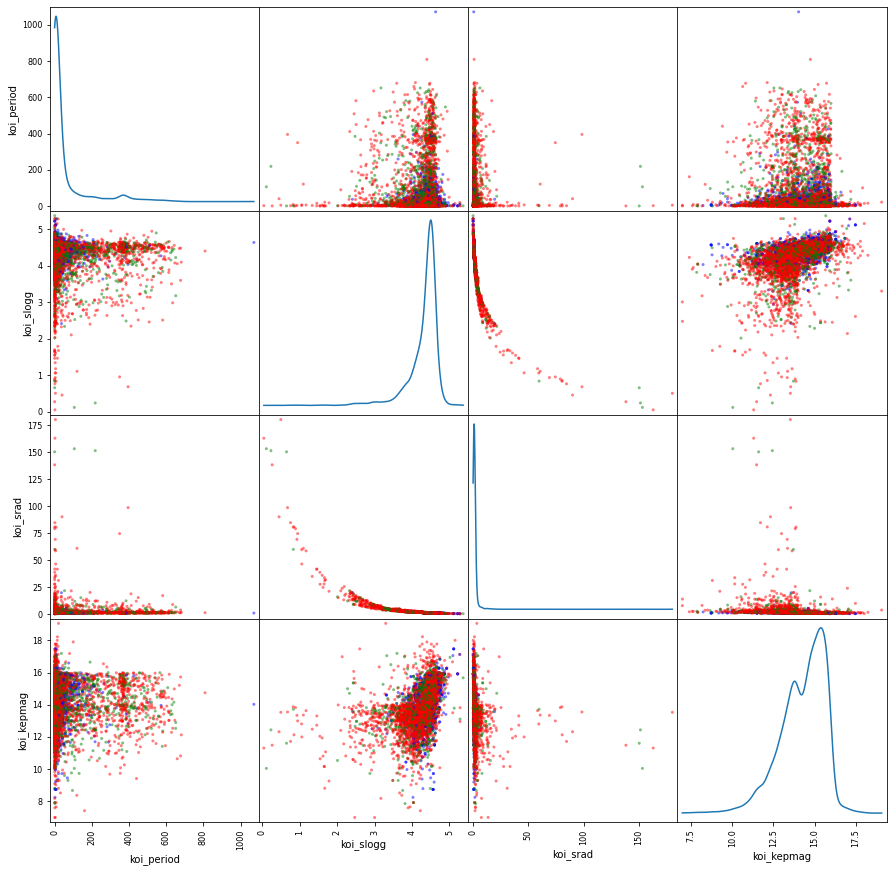

In [15]:
#visualize the dataset before all the manipulations
#this visualization comes from Introduciton to Machine Learning with Python

#coloring points courtesy of 
#https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

color_key = {'FALSE POSITIVE': 'red', 'CONFIRMED': 'blue', 'CANDIDATE': 'green'}

pd.plotting.scatter_matrix(signal1_df, c=signal1_df['koi_disposition'].apply(lambda x: color_key[x]), figsize = (15, 15))

plt.show()

In [16]:
# I'm going to try implementing KNN for this one because it's a classification problem. May also try SVM or others


planets = neighbors.KNeighborsClassifier(n_neighbors = 5)
planets.fit(X_train_sc, y_train_sc)

print(planets)

KNeighborsClassifier()


In [21]:
#make predictions

pred1 = planets.predict(X_test_sc)

print(pred1)

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [22]:
#writing a loop to score the algorythm
#Similar to class example

train_scores = []
test_scores = []

for k in range(1, 20, 2):
    planets2 = KNeighborsClassifier(n_neighbors=k)
    planets2.fit(X_train_sc, y_train_sc)
    train_score = planets2.score(X_train_sc, y_train_sc)
    test_score = planets2.score(X_test_sc, y_test_sc)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score:.3f}/{test_score: .3f}')


    

k: 1, Train/Test Score: 1.000/ 0.449
k: 3, Train/Test Score: 0.669/ 0.431
k: 5, Train/Test Score: 0.565/ 0.418
k: 7, Train/Test Score: 0.513/ 0.400
k: 9, Train/Test Score: 0.479/ 0.386
k: 11, Train/Test Score: 0.456/ 0.386
k: 13, Train/Test Score: 0.438/ 0.379
k: 15, Train/Test Score: 0.424/ 0.376
k: 17, Train/Test Score: 0.410/ 0.368
k: 19, Train/Test Score: 0.403/ 0.366


Note: the KNN classifier probably failed for this dataset because of the really poor separation between the different classes in the features included. 